In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [83]:
data = pd.read_csv('data/cleaned_data.csv')

In [84]:
len(data)

825

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery (WHrs)        810 non-null    float64
 1   Bus (MHz)             762 non-null    float64
 2   CPU Brand Modifier    824 non-null    object 
 3   CPU Generation        808 non-null    float64
 4   CPU Manufacturer      825 non-null    object 
 5   CPU Speed (GHz)       825 non-null    float64
 6   GPU Manufacturer      824 non-null    object 
 7   Manufacturer          825 non-null    object 
 8   RAM (GB)              825 non-null    int64  
 9   RAM Type              821 non-null    object 
 10  Screen Resolution     825 non-null    object 
 11  Screen Size (Inches)  825 non-null    float64
 12  Storage (GB)          824 non-null    float64
 13  Weight (kg)           718 non-null    float64
 14  Price                 825 non-null    int64  
dtypes: float64(7), int64(2)

In [86]:
data.head()

,Battery (WHrs),Bus (MHz),CPU Brand Modifier,CPU Generation,CPU Manufacturer,CPU Speed (GHz),GPU Manufacturer,Manufacturer,RAM (GB),RAM Type,Screen Resolution,Screen Size (Inches),Storage (GB),Weight (kg),Price
0,75.0,7467.0,Ultra5,125.0,Intel,4.5,Intel,Asus,16,LPDDR5X,2880x1800,14.0,512.0,1.30,26990000
1,59.0,6400.0,5,8640.0,AMD,4.9,Amd,HP,16,LPDDR5,2880x1800,14.0,512.0,NaN,28990000
2,70.0,8533.0,Ultra7,258.0,Intel,4.8,Intel,Lenovo,32,LPDDR5x,2880x1800,15.3,1024.0,1.53,42990000
3,59.0,6400.0,Ultra7,155.0,Intel,4.8,Intel,HP,32,LPDDR5,2880x1800,14.0,512.0,NaN,35290000
4,41.0,3200.0,7,150.0,Intel,5.4,Intel,HP,16,DDR4,1920x1080,14.0,512.0,1.40,22990000


In [87]:
# remove duplicates row and row where price is nan
data.drop_duplicates(inplace=True)
data.dropna(subset=['Price'], axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 0 to 824
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Battery (WHrs)        776 non-null    float64
 1   Bus (MHz)             728 non-null    float64
 2   CPU Brand Modifier    790 non-null    object 
 3   CPU Generation        776 non-null    float64
 4   CPU Manufacturer      791 non-null    object 
 5   CPU Speed (GHz)       791 non-null    float64
 6   GPU Manufacturer      790 non-null    object 
 7   Manufacturer          791 non-null    object 
 8   RAM (GB)              791 non-null    int64  
 9   RAM Type              787 non-null    object 
 10  Screen Resolution     791 non-null    object 
 11  Screen Size (Inches)  791 non-null    float64
 12  Storage (GB)          790 non-null    float64
 13  Weight (kg)           685 non-null    float64
 14  Price                 791 non-null    int64  
dtypes: float64(7), int64(2)

In [88]:
print(len(data))

791


In [89]:
features_data = data.drop('Price',axis=1)
price_data = data['Price']

<AxesSubplot: >

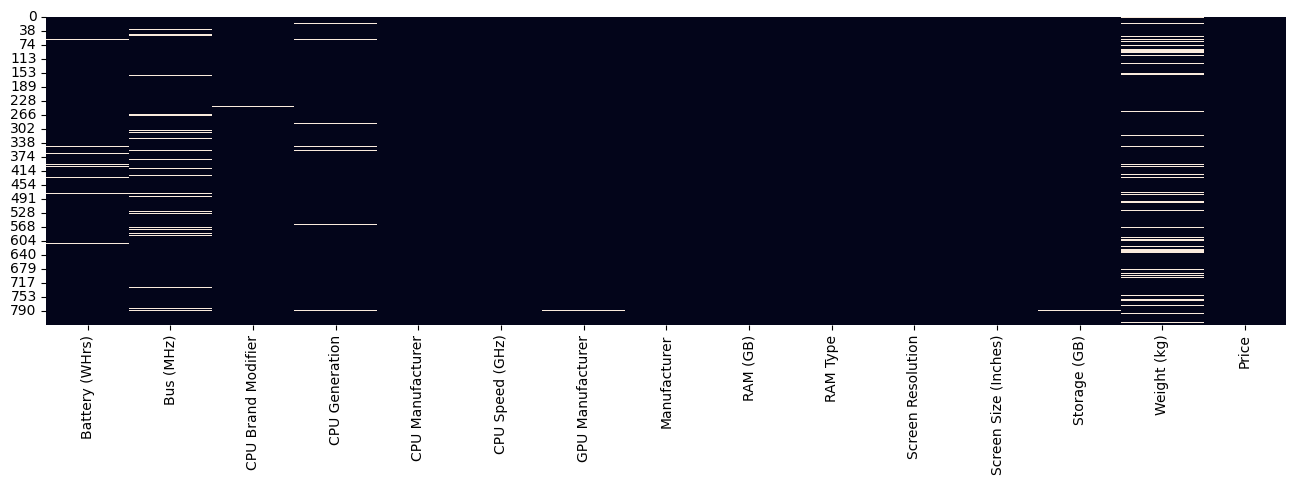

In [90]:
plt.figure(figsize=(16, 4))
sns.heatmap(data.isnull(), cbar= False, fmt='.0f')

In [91]:
numerical_features=[col for col in features_data.columns if features_data[col].dtype!='O']
numerical_features

['Battery (WHrs)',
 'Bus (MHz)',
 'CPU Generation',
 'CPU Speed (GHz)',
 'RAM (GB)',
 'Screen Size (Inches)',
 'Storage (GB)',
 'Weight (kg)']

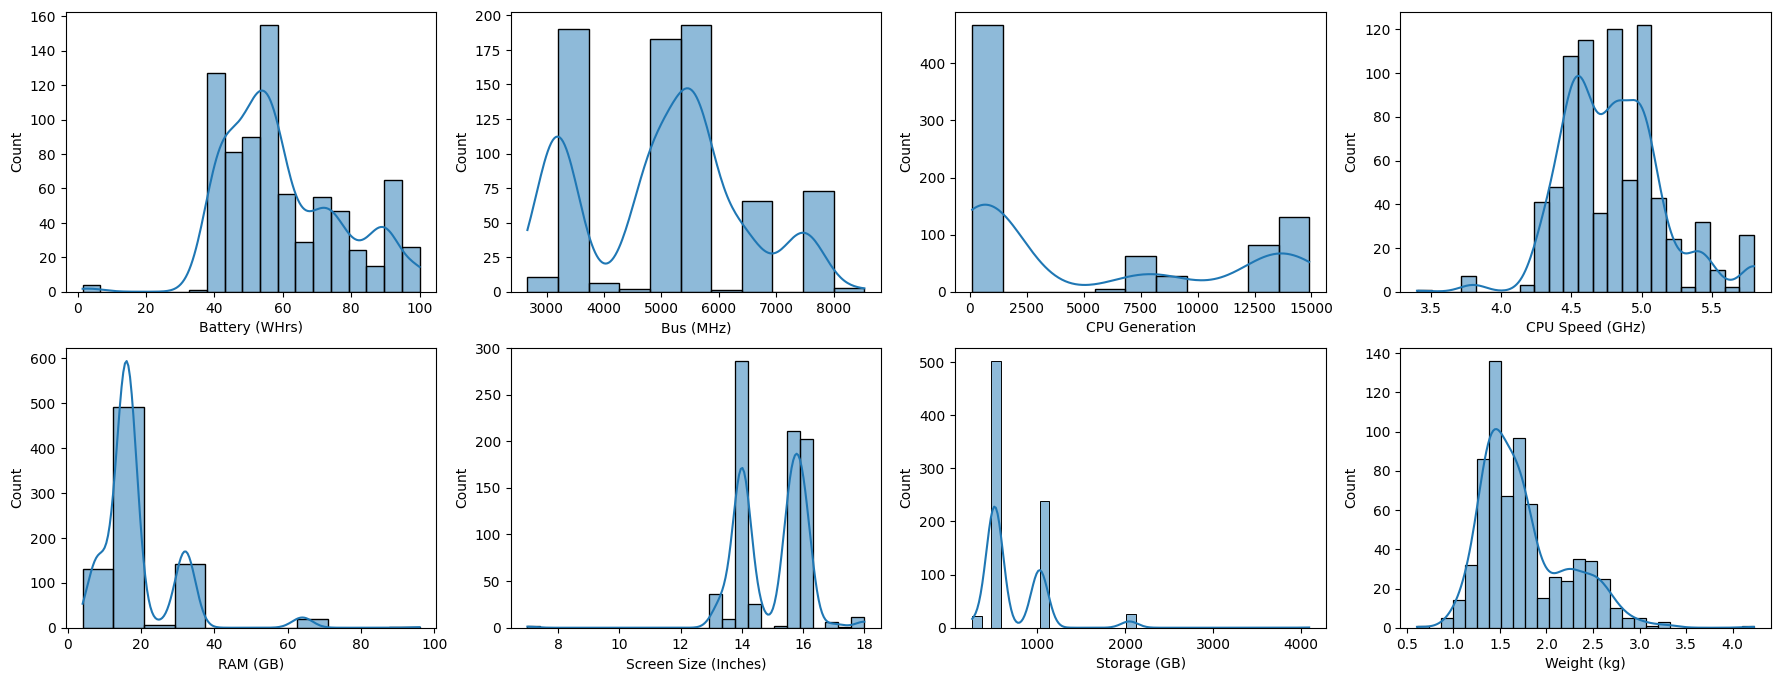

In [92]:
fig, ax = plt.subplots(2,4, figsize=(22,8))
for i in range(len(numerical_features)):
    row,cols = divmod(i, 4)
    sns.histplot(features_data[numerical_features[i]], kde=True, ax=ax[row, cols])
plt.show()

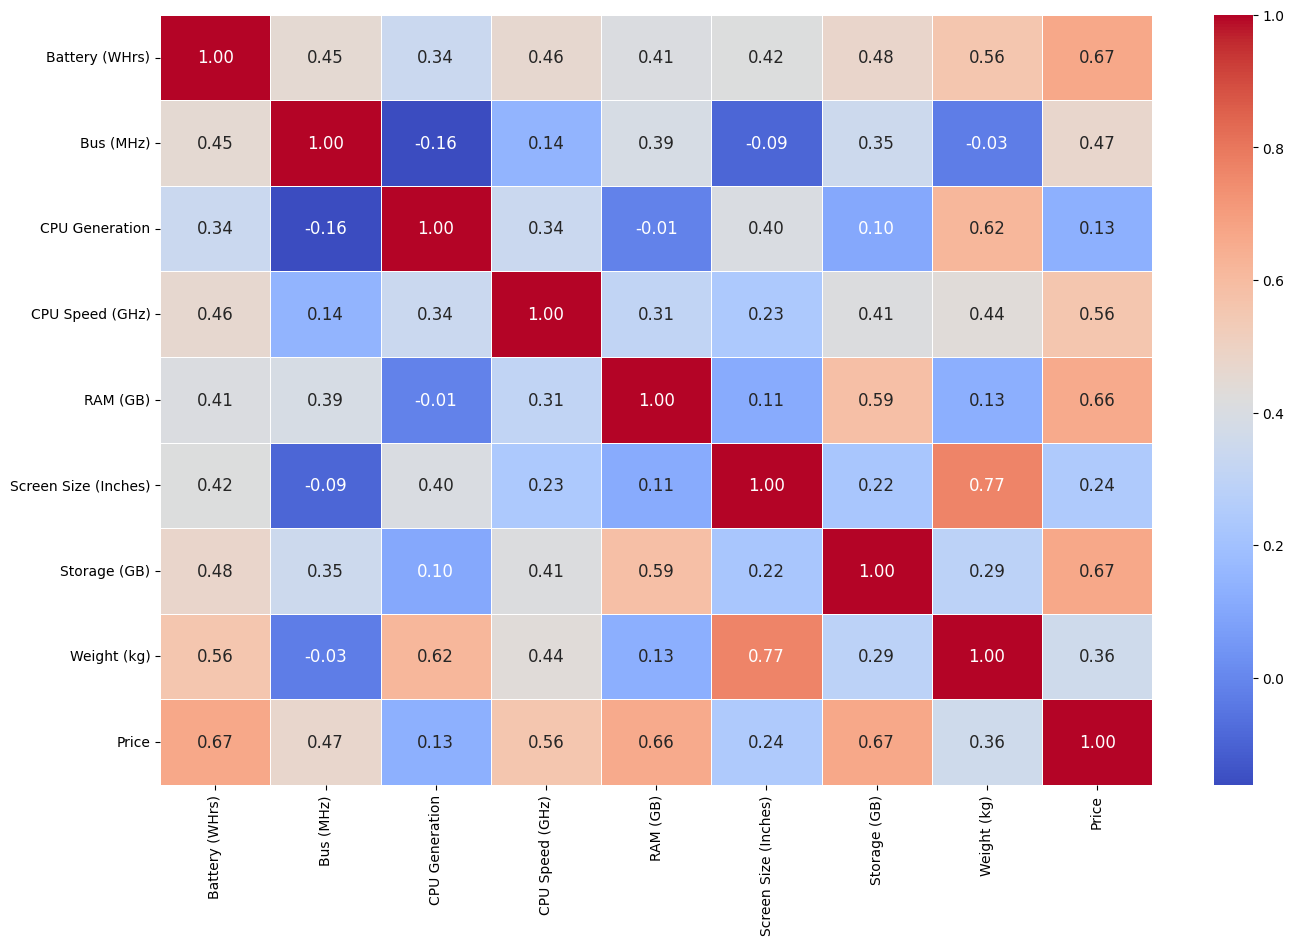

In [93]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, annot_kws={"size": 12})
plt.show()

In [94]:
categorical_features=[col for col in features_data.columns if features_data[col].dtype=='O']
categorical_features

['CPU Brand Modifier',
 'CPU Manufacturer',
 'GPU Manufacturer',
 'Manufacturer',
 'RAM Type',
 'Screen Resolution']

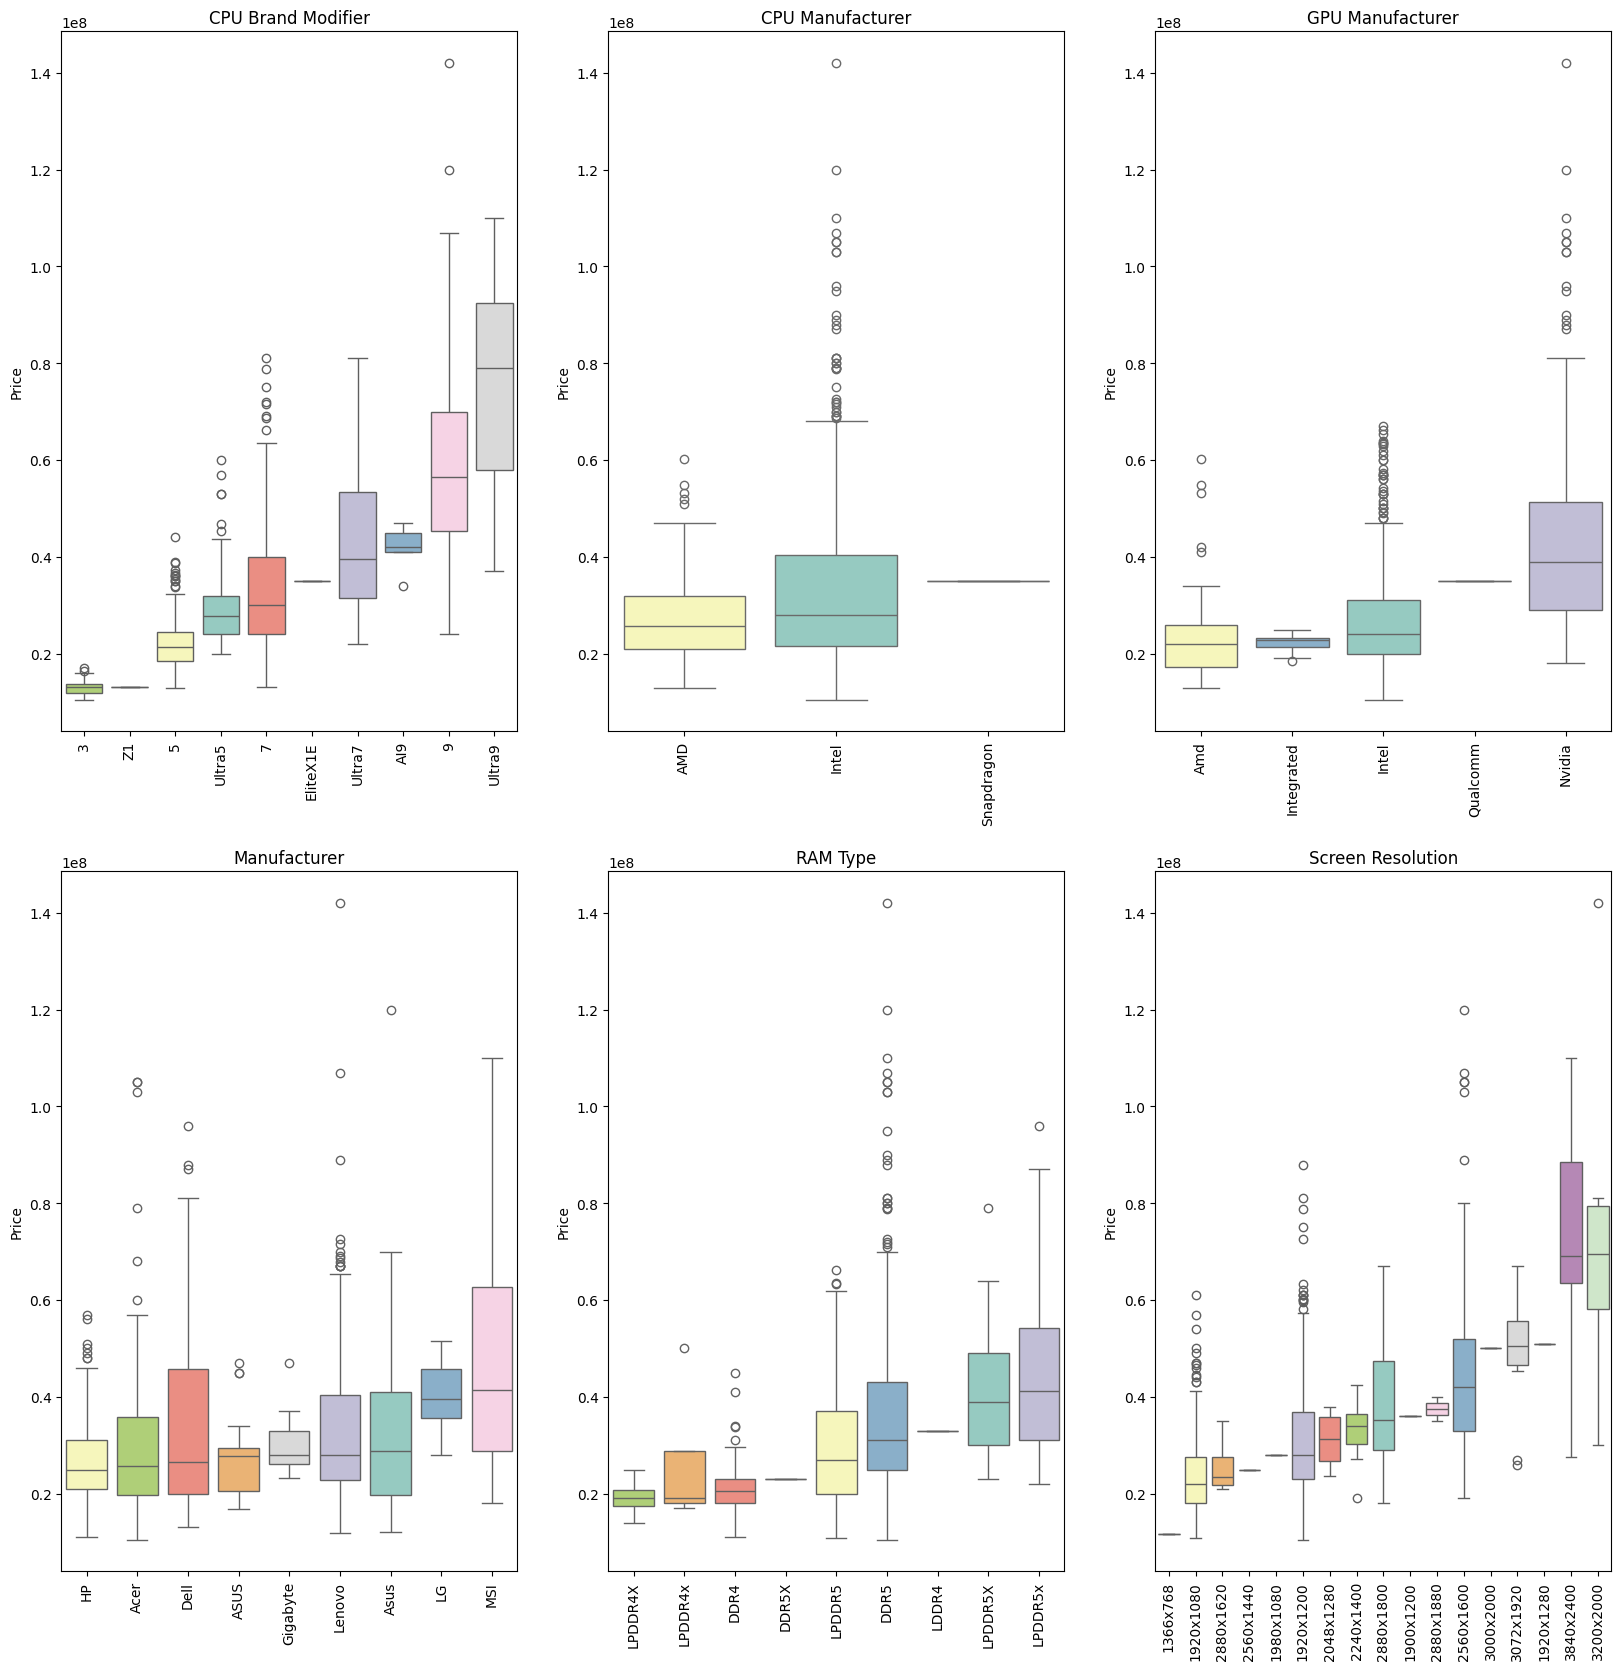

In [95]:
plt.figure(figsize=(20,20))
for i in range(len(categorical_features)):
    plt.subplot(2,3,i+1)
    plt.title(categorical_features[i])
    sns.boxplot(data=data, x=categorical_features[i], y="Price", palette="Set3", hue=categorical_features[i],legend=False,
                order=data['Price'].groupby(data[categorical_features[i]]).median().sort_values().index
                )
    plt.xticks(rotation=90)
    plt.xlabel('')

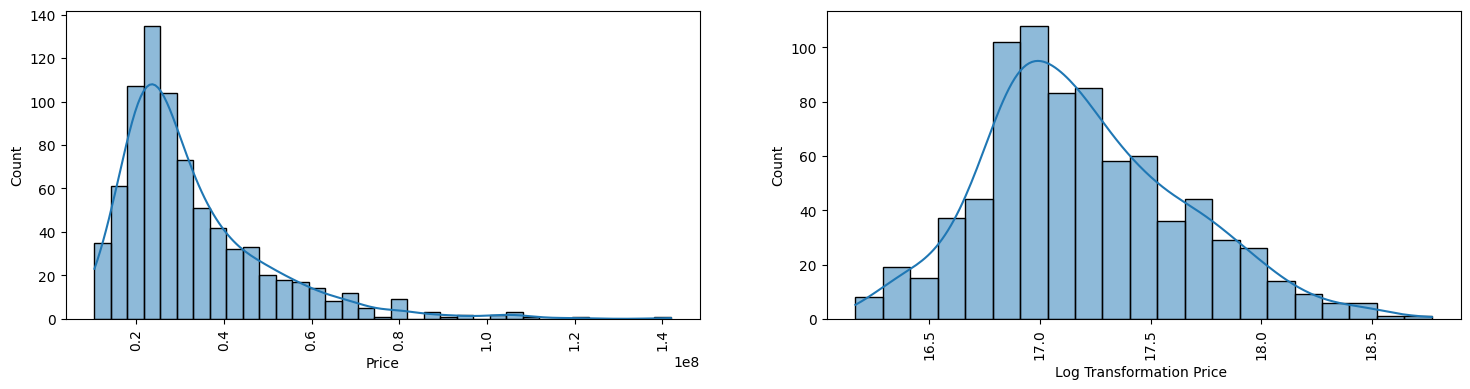

In [96]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.histplot(data['Price'], kde=True)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.histplot(np.log(data['Price']), kde=True)
plt.xlabel('Log Transformation Price ')
plt.xticks(rotation=90)
plt.show()

In [97]:
process_data = data.copy()

In [98]:
# nan ratio
nan_ratio = process_data.isnull().sum() / len(process_data)
nan_ratio = nan_ratio[nan_ratio > 0]
nan_ratio.sort_values(inplace=True)
nan_ratio

CPU Brand Modifier    0.001264
GPU Manufacturer      0.001264
Storage (GB)          0.001264
RAM Type              0.005057
Battery (WHrs)        0.018963
CPU Generation        0.018963
Bus (MHz)             0.079646
Weight (kg)           0.134008
dtype: float64

In [99]:
#fill nan values with median
process_data["RAM (GB)"].fillna(process_data["RAM (GB)"].median(), inplace=True)
process_data["Screen Size (Inches)"].fillna(process_data["Screen Size (Inches)"].median(), inplace=True)
process_data["Storage (GB)"].fillna(process_data["Storage (GB)"].median(), inplace=True)
process_data["Weight (kg)"].fillna(process_data["Weight (kg)"].median(), inplace=True)
process_data["Battery (WHrs)"].fillna(process_data["Battery (WHrs)"].median(), inplace=True)
process_data["Bus (MHz)"].fillna(process_data["Bus (MHz)"].median(), inplace=True)
process_data["CPU Generation"].fillna(process_data["CPU Generation"].mode()[0], inplace=True)
process_data["CPU Speed (GHz)"].fillna(process_data["CPU Speed (GHz)"].median(), inplace=True)

In [100]:
def fil_nan_by_prob(df, col):
    prob = dict(df[col].value_counts(normalize=True))
    df[col].fillna(pd.Series(np.random.choice(list(prob.keys()), p=list(prob.values()), size=len(df))), inplace=True)

fil_nan_by_prob(process_data, 'GPU Manufacturer')
fil_nan_by_prob(process_data, 'CPU Brand Modifier')

In [101]:
# calulate median of CPU's stat group by CPU manufacturer (AMD or Intel)
median_generation = process_data['CPU Generation'].groupby(process_data['CPU Manufacturer']).median()
median_speed = process_data['CPU Speed (GHz)'].groupby(process_data['CPU Manufacturer']).median()

In [102]:
process_data['CPU Generation'].fillna(data['CPU Manufacturer'].map(median_generation), inplace=True)
process_data['CPU Speed (GHz)'].fillna(data['CPU Manufacturer'].map(median_speed), inplace=True)

In [103]:
process_data['CPU'] = process_data['CPU Manufacturer'] + ' Gen ' + process_data['CPU Generation'].astype(str) + "th"

In [104]:
process_data.drop(columns=['CPU Manufacturer', 'CPU Generation'], axis=1, inplace=True)

In [105]:
# with column Screen Resolution, extract 1 column is Screen Resolution (2k,4k) and ratio of screen
process_data['Screen Ratio'] = process_data['Screen Resolution'].str.split('x').str[0].astype(float) / process_data['Screen Resolution'].str.split('x').str[1].astype(float)

In [106]:
def convert_resolution(resolution: str):
    if isinstance(resolution, str):
        w,h = resolution.split('x')
    else:
        return '1080p'
    if int(w) >= 3840:
        return '4k'
    elif int(w) >= 2880:
        return '3k'
    elif int(w) >= 2560:
        return '2k'
    elif int(w) >= 1920:
        return '1080p'
    elif int(w) >= 1366:
        return '720p'
    else:
        return '1080p'
process_data['Screen Resolution'] = process_data['Screen Resolution'].apply(convert_resolution)

In [107]:
def convert_ratio(ratio: float):
    if ratio >= 1.7:
        return '16:9'
    elif ratio == 1.6:
        return '16:10'
    elif ratio == 1.5:
        return '3:2'
    else:
        return '16:9'
process_data['Screen Ratio'] = process_data['Screen Ratio'].apply(convert_ratio)

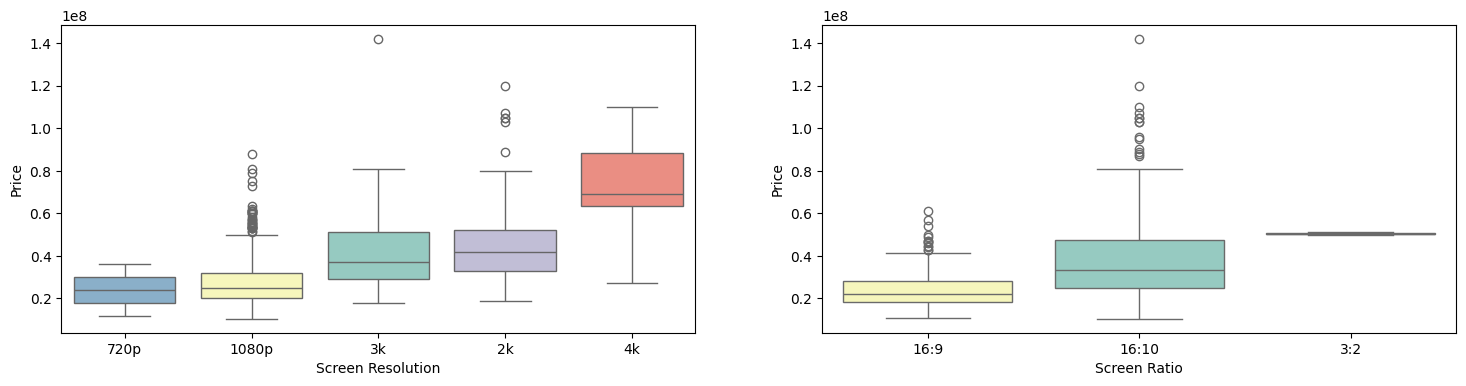

In [108]:
# plot boxplot of Price (VND) group by Screen Resolution and Screen Ratio
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(data=process_data, x='Screen Resolution', y="Price", palette="Set3", hue='Screen Resolution',legend=False,
            order=process_data['Price'].groupby(process_data['Screen Resolution']).median().sort_values().index
            )
plt.subplot(1,2,2)
sns.boxplot(data=process_data, x='Screen Ratio', y="Price", palette="Set3", hue='Screen Ratio',legend=False,
            order=process_data['Price'].groupby(process_data['Screen Ratio']).median().sort_values().index
            )
plt.show()

In [109]:
categorical_features=['GPU Manufacturer', 'Manufacturer', 'RAM Type', 'CPU', 'Screen Resolution', 'Screen Ratio', 'CPU Brand Modifier']

In [110]:
from sklearn.preprocessing import OneHotEncoder

In [111]:
# use one hot encoder for categorical features
ohe = OneHotEncoder(sparse=False)
ohe.fit(process_data[categorical_features])

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [112]:
one_hot_data = pd.DataFrame(ohe.transform(process_data[categorical_features]), columns=ohe.get_feature_names_out())

In [113]:
process_data.drop(columns=categorical_features, axis=1, inplace=True)

In [114]:

process_data.reset_index(drop=True, inplace=True)

In [115]:
one_hot_data.index

RangeIndex(start=0, stop=791, step=1)

In [116]:
# concat one hot data and numerical data
final_data = pd.concat([process_data, one_hot_data], axis=1)

In [117]:
final_data.isnull().sum()

Battery (WHrs)                 0
Bus (MHz)                      0
CPU Speed (GHz)                0
RAM (GB)                       0
Screen Size (Inches)           0
                              ..
CPU Brand Modifier_EliteX1E    0
CPU Brand Modifier_Ultra5      0
CPU Brand Modifier_Ultra7      0
CPU Brand Modifier_Ultra9      0
CPU Brand Modifier_Z1          0
Length: 119, dtype: int64

In [118]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 119 entries, Battery (WHrs) to CPU Brand Modifier_Z1
dtypes: float64(117), int64(2)
memory usage: 735.5 KB


In [119]:
# save data
final_data.to_csv('./data/process_data.csv', index=False)